# Machine Learning Homework1 Car Price Prediction

### 作業說明

使用HW1_CarPrice.csv檔案進行Regression Analysis,
相關欄位請參考HW1欄位說明的內容.
迴歸目標項為Price.

基本上要有幾個部分:
1. 資料清理與視覺化圖表
2. 敘述性統計分析
3. 特徵相關性分析
4. 資料分割與建置迴歸模型 (線性 or 非線性)
5. 模型效能評估
6. 預測結果分析


### 1. 資料清理與視覺化圖表

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
carData = pd.read_csv("path/HW1_CarPrice.csv")

In [ ]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

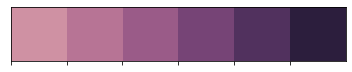

In [ ]:
purpleOuO = [
  # "#EDD1CB", "#E0B1B4", 
  "#CF91A3", "#B77495", 
  "#9A5B88", "#764476", 
  "#51315E", "#2C1E3D"
]
sns.palplot(sns.color_palette(purpleOuO))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


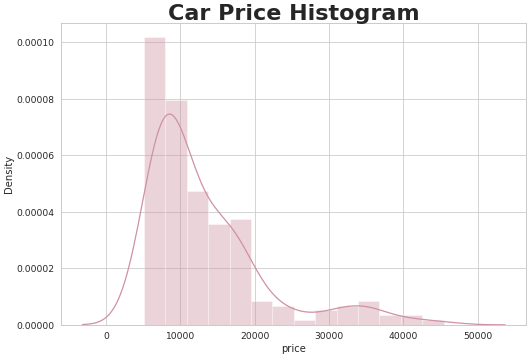

In [ ]:
sns.set()
plt.figure(figsize=(15, 10), dpi=40)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(purpleOuO))
sns.set_context('talk')
sns.distplot(carData.price)
plt.title("Car Price Histogram", fontsize = 40, fontweight = 'bold')
plt.xlabel("price")
plt.ylabel("Density")
plt.show()

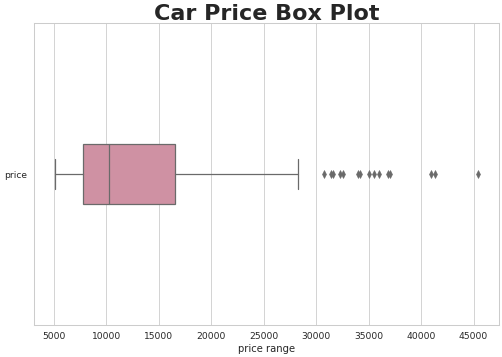

In [ ]:
# price 四分位圖
plt.figure(figsize=(15, 10), dpi=40)
sns.boxplot(data=carData[['price']], orient="h", palette=purpleOuO ,whis=1.5, saturation=1, width=0.2, fliersize=10)
plt.title("Car Price Box Plot", fontsize = 40, fontweight = 'bold')
plt.xlabel("price range")
plt.ylabel("")
plt.show()

In [ ]:
carData['symboling'] = carData['symboling'].astype('object')

In [ ]:
carData['CarName'].astype('category').value_counts()

peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

In [ ]:
carData['carCompany'] = carData['CarName'].apply(lambda x: x.split(" ")[0])
carData['carCompany'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: carCompany, dtype: int64

In [ ]:
carData.loc[carData['carCompany'] == "vw", 'carCompany'] = 'volkswagen'
carData.loc[carData['carCompany'] == "vokswagen", 'carCompany'] = 'volkswagen'
carData.loc[carData['carCompany'] == "porcshce", 'carCompany'] = 'porsche'
carData.loc[carData['carCompany'] == "toyouta", 'carCompany'] = 'toyota'
carData.loc[carData['carCompany'] == "Nissan", 'carCompany'] = 'nissan'
carData.loc[carData['carCompany'] == "maxda", 'carCompany'] = 'mazda'
carData = carData.drop('CarName', axis=1)

In [ ]:
carData['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
carData['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
carData['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [ ]:
carData.loc[carData['doornumber'] == "four", 'doornumber'] = 4
carData.loc[carData['doornumber'] == "two", 'doornumber'] = 2

In [ ]:
carData['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
carData['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
carData['enginelocation'].astype('category').value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [ ]:
carData['enginetype'].astype('category').value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [ ]:
carData['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
carData.loc[carData['cylindernumber'] == "twelve", 'cylindernumber'] = 12
carData.loc[carData['cylindernumber'] == "eight", 'cylindernumber'] = 8
carData.loc[carData['cylindernumber'] == "six", 'cylindernumber'] = 6
carData.loc[carData['cylindernumber'] == "five", 'cylindernumber'] = 5
carData.loc[carData['cylindernumber'] == "four", 'cylindernumber'] = 4
carData.loc[carData['cylindernumber'] == "three", 'cylindernumber'] = 3
carData.loc[carData['cylindernumber'] == "two", 'cylindernumber'] = 2

In [ ]:
carData['fuelsystem'].astype('category').value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [ ]:
carData['carPrice'] = carData['price']
carData = carData.drop('price', axis=1)

In [ ]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### 2. 敘述性統計分析

In [ ]:
carData.describe()

car_ID   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000   98.756585  174.049268   65.907805   53.724878   
std     59.322565    6.021776   12.337289    2.145204    2.443522   
min      1.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg      carPrice  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

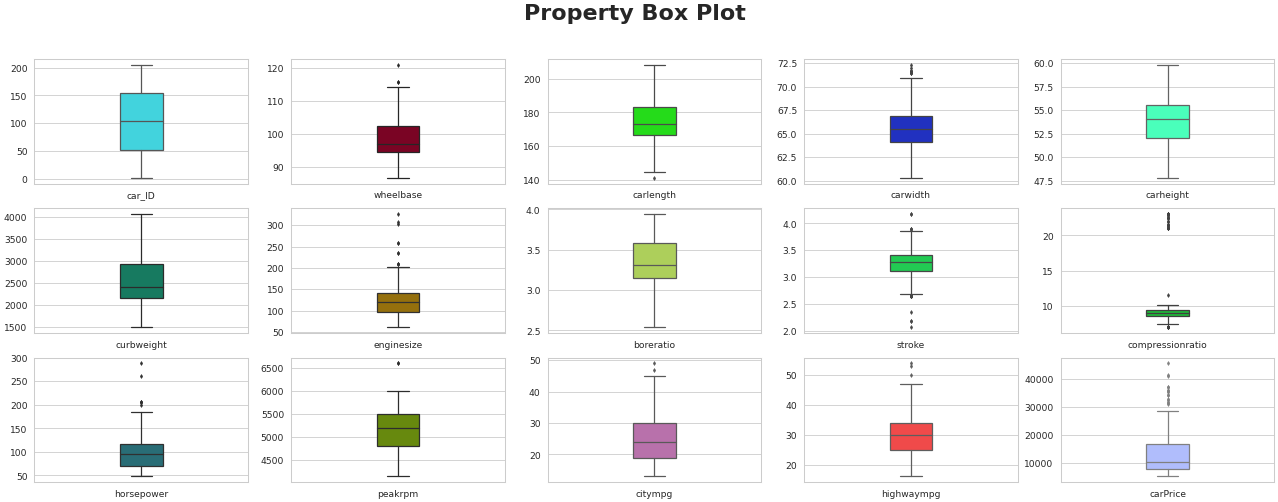

In [ ]:
from random import choice as randChoice

carDataPropertyNumericalValue = carData.select_dtypes(include=['float64', 'int'])

countSubplot = 1
plt.figure(figsize=(40, 14), dpi=40)

for title in carDataPropertyNumericalValue:
  plt.subplot(3, 5, countSubplot)
  hexColor = ["#"+''.join([randChoice('ABCDEF0123456789') for i in range(6)])]
  sns.boxplot(data=carData[[title]], orient="v", palette=hexColor ,whis=1.5, saturation=1, width=0.2)
  countSubplot += 1

plt.suptitle("Property Box Plot", fontsize = 40, fontweight = 'bold')
plt.show()

In [ ]:
carDataX = carData
carDataX = carDataX.drop('carPrice', axis=1) # <class 'pandas.core.frame.DataFrame'>
carDataColumsName = carData.columns
carDataY = carData
carDataY = carDataY.drop((carDataColumsName.drop('carPrice')), axis=1)

In [ ]:
CarClassification = carDataX.select_dtypes(include=['object'])
carDataX = carDataX.drop(list(CarClassification.columns), axis=1)
NewColumnClassification = pd.get_dummies(CarClassification, drop_first=True)
carDataX = pd.concat([carDataX, NewColumnClassification], axis=1)

In [ ]:
from sklearn.preprocessing import scale

carDataXColumnName = carDataX.columns
carDataX = pd.DataFrame(scale(carDataX))
carDataX.columns = carDataXColumnName

In [ ]:
carDataX.describe()

car_ID     wheelbase     carlength      carwidth     carheight  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean  -4.549207e-17 -1.496906e-15  3.730349e-15  9.964929e-16 -4.408398e-16   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -1.723622e+00 -2.023713e+00 -2.677244e+00 -2.620512e+00 -2.430664e+00   
25%   -8.618111e-01 -7.085959e-01 -6.296552e-01 -8.447824e-01 -7.076263e-01   
50%    0.000000e+00 -2.924196e-01 -6.900603e-02 -1.905661e-01  1.538927e-01   
75%    8.618111e-01  6.065210e-01  7.354037e-01  4.636501e-01  7.282388e-01   
max    1.723622e+00  3.686225e+00  2.766741e+00  2.987056e+00  2.492302e+00   

         curbweight    enginesize     boreratio        stroke  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean   9.910771e-17  5.415722e-19  2.267021e-15  2.126483e-15   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -2.055348e+00 -1.586561e+00 -2.923049e+00 -3.789311e+00   
25%   -7.904486e-01 -7.199469e-01 -6.653141e-01 -4.648342e-01   
50%   -2.725519e-01 -1.662771e-01 -7.312136e-02  1.105560e-01   
75%    7.305117e-01  3.392475e-01  9.262039e-01  4.941494e-01   
max    2.907988e+00  4.792679e+00  2.258638e+00  2.923575e+00   

       compressionratio  ...  carCompany_nissan  carCompany_peugeot  \
count      2.050000e+02  ...       2.050000e+02        2.050000e+02   
mean      -3.115394e-16  ...      -6.228080e-17       -4.947262e-16   
std        1.002448e+00  ...       1.002448e+00        1.002448e+00   
min       -7.931011e-01  ...      -3.102526e-01       -2.381198e-01   
25%       -3.892993e-01  ...      -3.102526e-01       -2.381198e-01   
50%       -2.883489e-01  ...      -3.102526e-01       -2.381198e-01   
75%       -1.873985e-01  ...      -3.102526e-01       -2.381198e-01   
max        3.244916e+00  ...       3.223180e+00        4.199567e+00   

       carCompany_plymouth  carCompany_porsche  carCompany_renault  \
count         2.050000e+02        2.050000e+02        2.050000e+02   
mean         -5.524037e-17        3.076130e-16       -1.252386e-16   
std           1.002448e+00        1.002448e+00        1.002448e+00   
min          -1.880254e-01       -1.581139e-01       -9.925833e-02   
25%          -1.880254e-01       -1.581139e-01       -9.925833e-02   
50%          -1.880254e-01       -1.581139e-01       -9.925833e-02   
75%          -1.880254e-01       -1.581139e-01       -9.925833e-02   
max           5.318432e+00        6.324555e+00        1.007472e+01   

       carCompany_saab  carCompany_subaru  carCompany_toyota  \
count     2.050000e+02       2.050000e+02       2.050000e+02   
mean     -1.437874e-16       8.529762e-17      -7.251652e-16   
std       1.002448e+00       1.002448e+00       1.002448e+00   
min      -1.736397e-01      -2.493515e-01      -4.300827e-01   
25%      -1.736397e-01      -2.493515e-01      -4.300827e-01   
50%      -1.736397e-01      -2.493515e-01      -4.300827e-01   
75%      -1.736397e-01      -2.493515e-01      -4.300827e-01   
max       5.759051e+00       4.010403e+00       2.325134e+00   

       carCompany_volkswagen  carCompany_volvo  
count           2.050000e+02      2.050000e+02  
mean           -6.452833e-16      3.552714e-16  
std             1.002448e+00      1.002448e+00  
min            -2.493515e-01     -2.381198e-01  
25%            -2.493515e-01     -2.381198e-01  
50%            -2.493515e-01     -2.381198e-01  
75%            -2.493515e-01     -2.381198e-01  
max             4.010403e+00      4.199567e+00  

[8 rows x 69 columns]

### 3. 特徵相關性分析

<Figure size 1440x720 with 0 Axes>

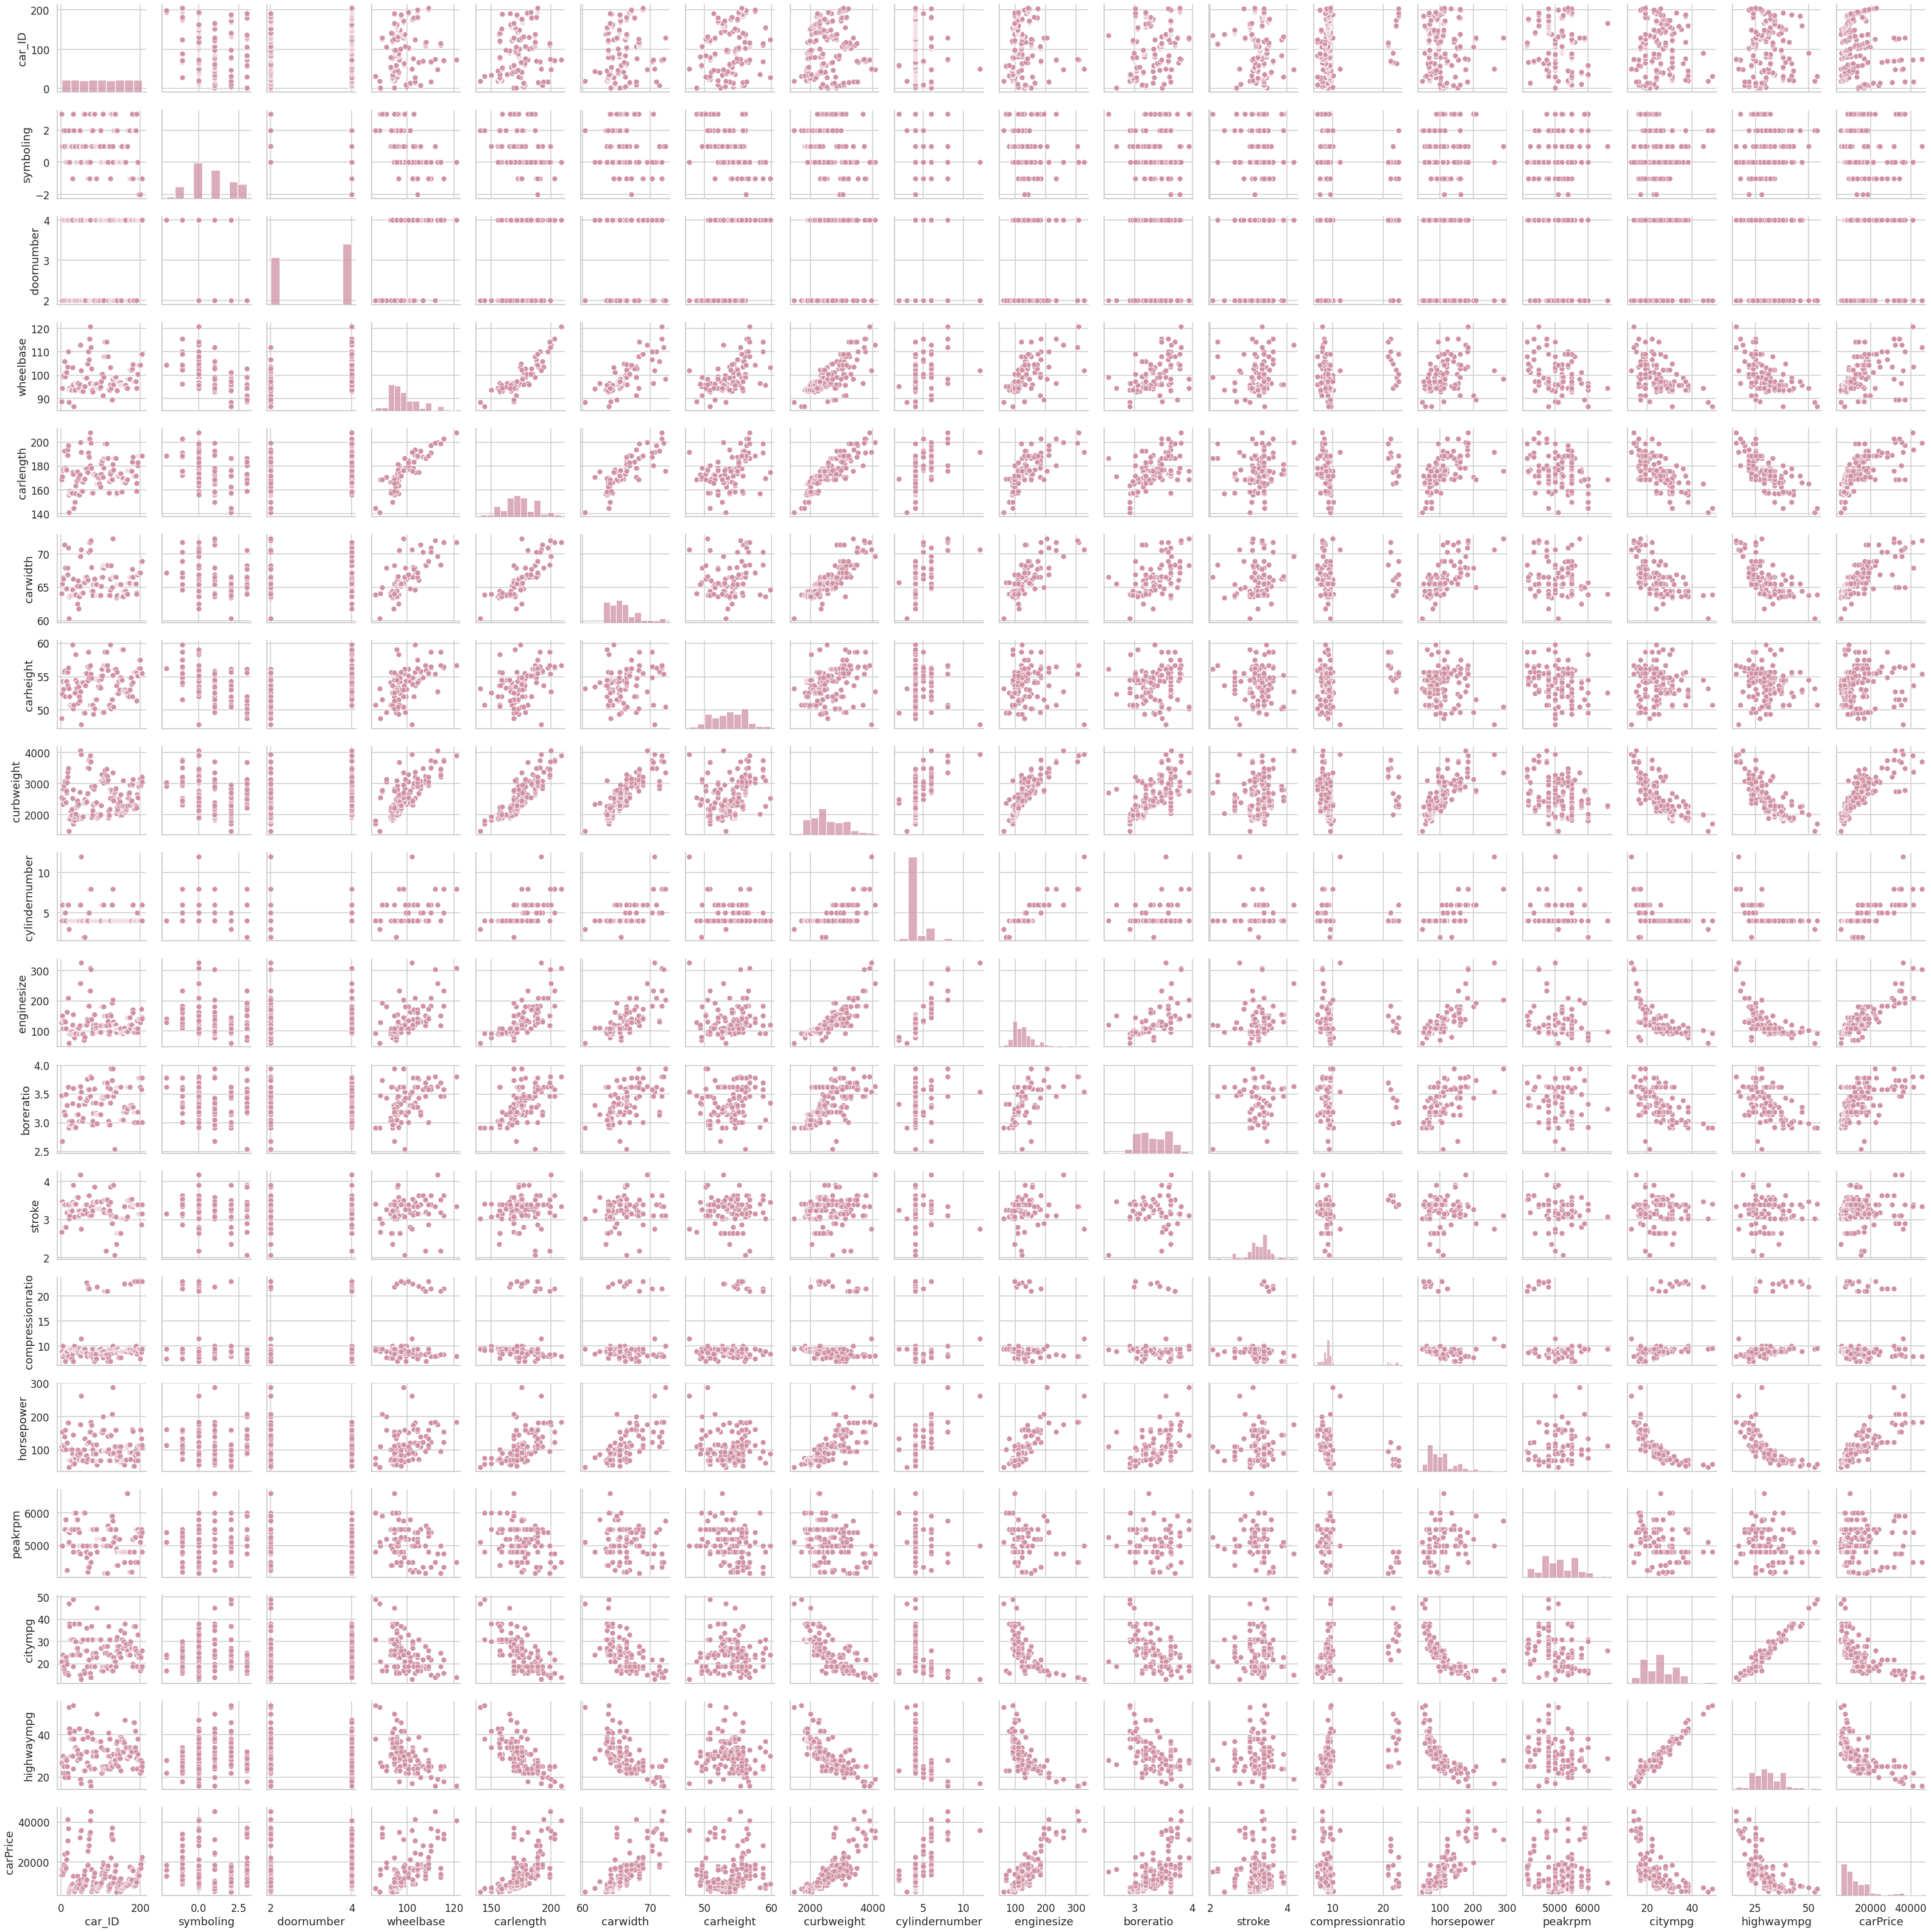

In [ ]:
plt.figure(figsize=(20, 10))
sns.pairplot(carData)
plt.show()

<Figure size 1440x720 with 0 Axes>

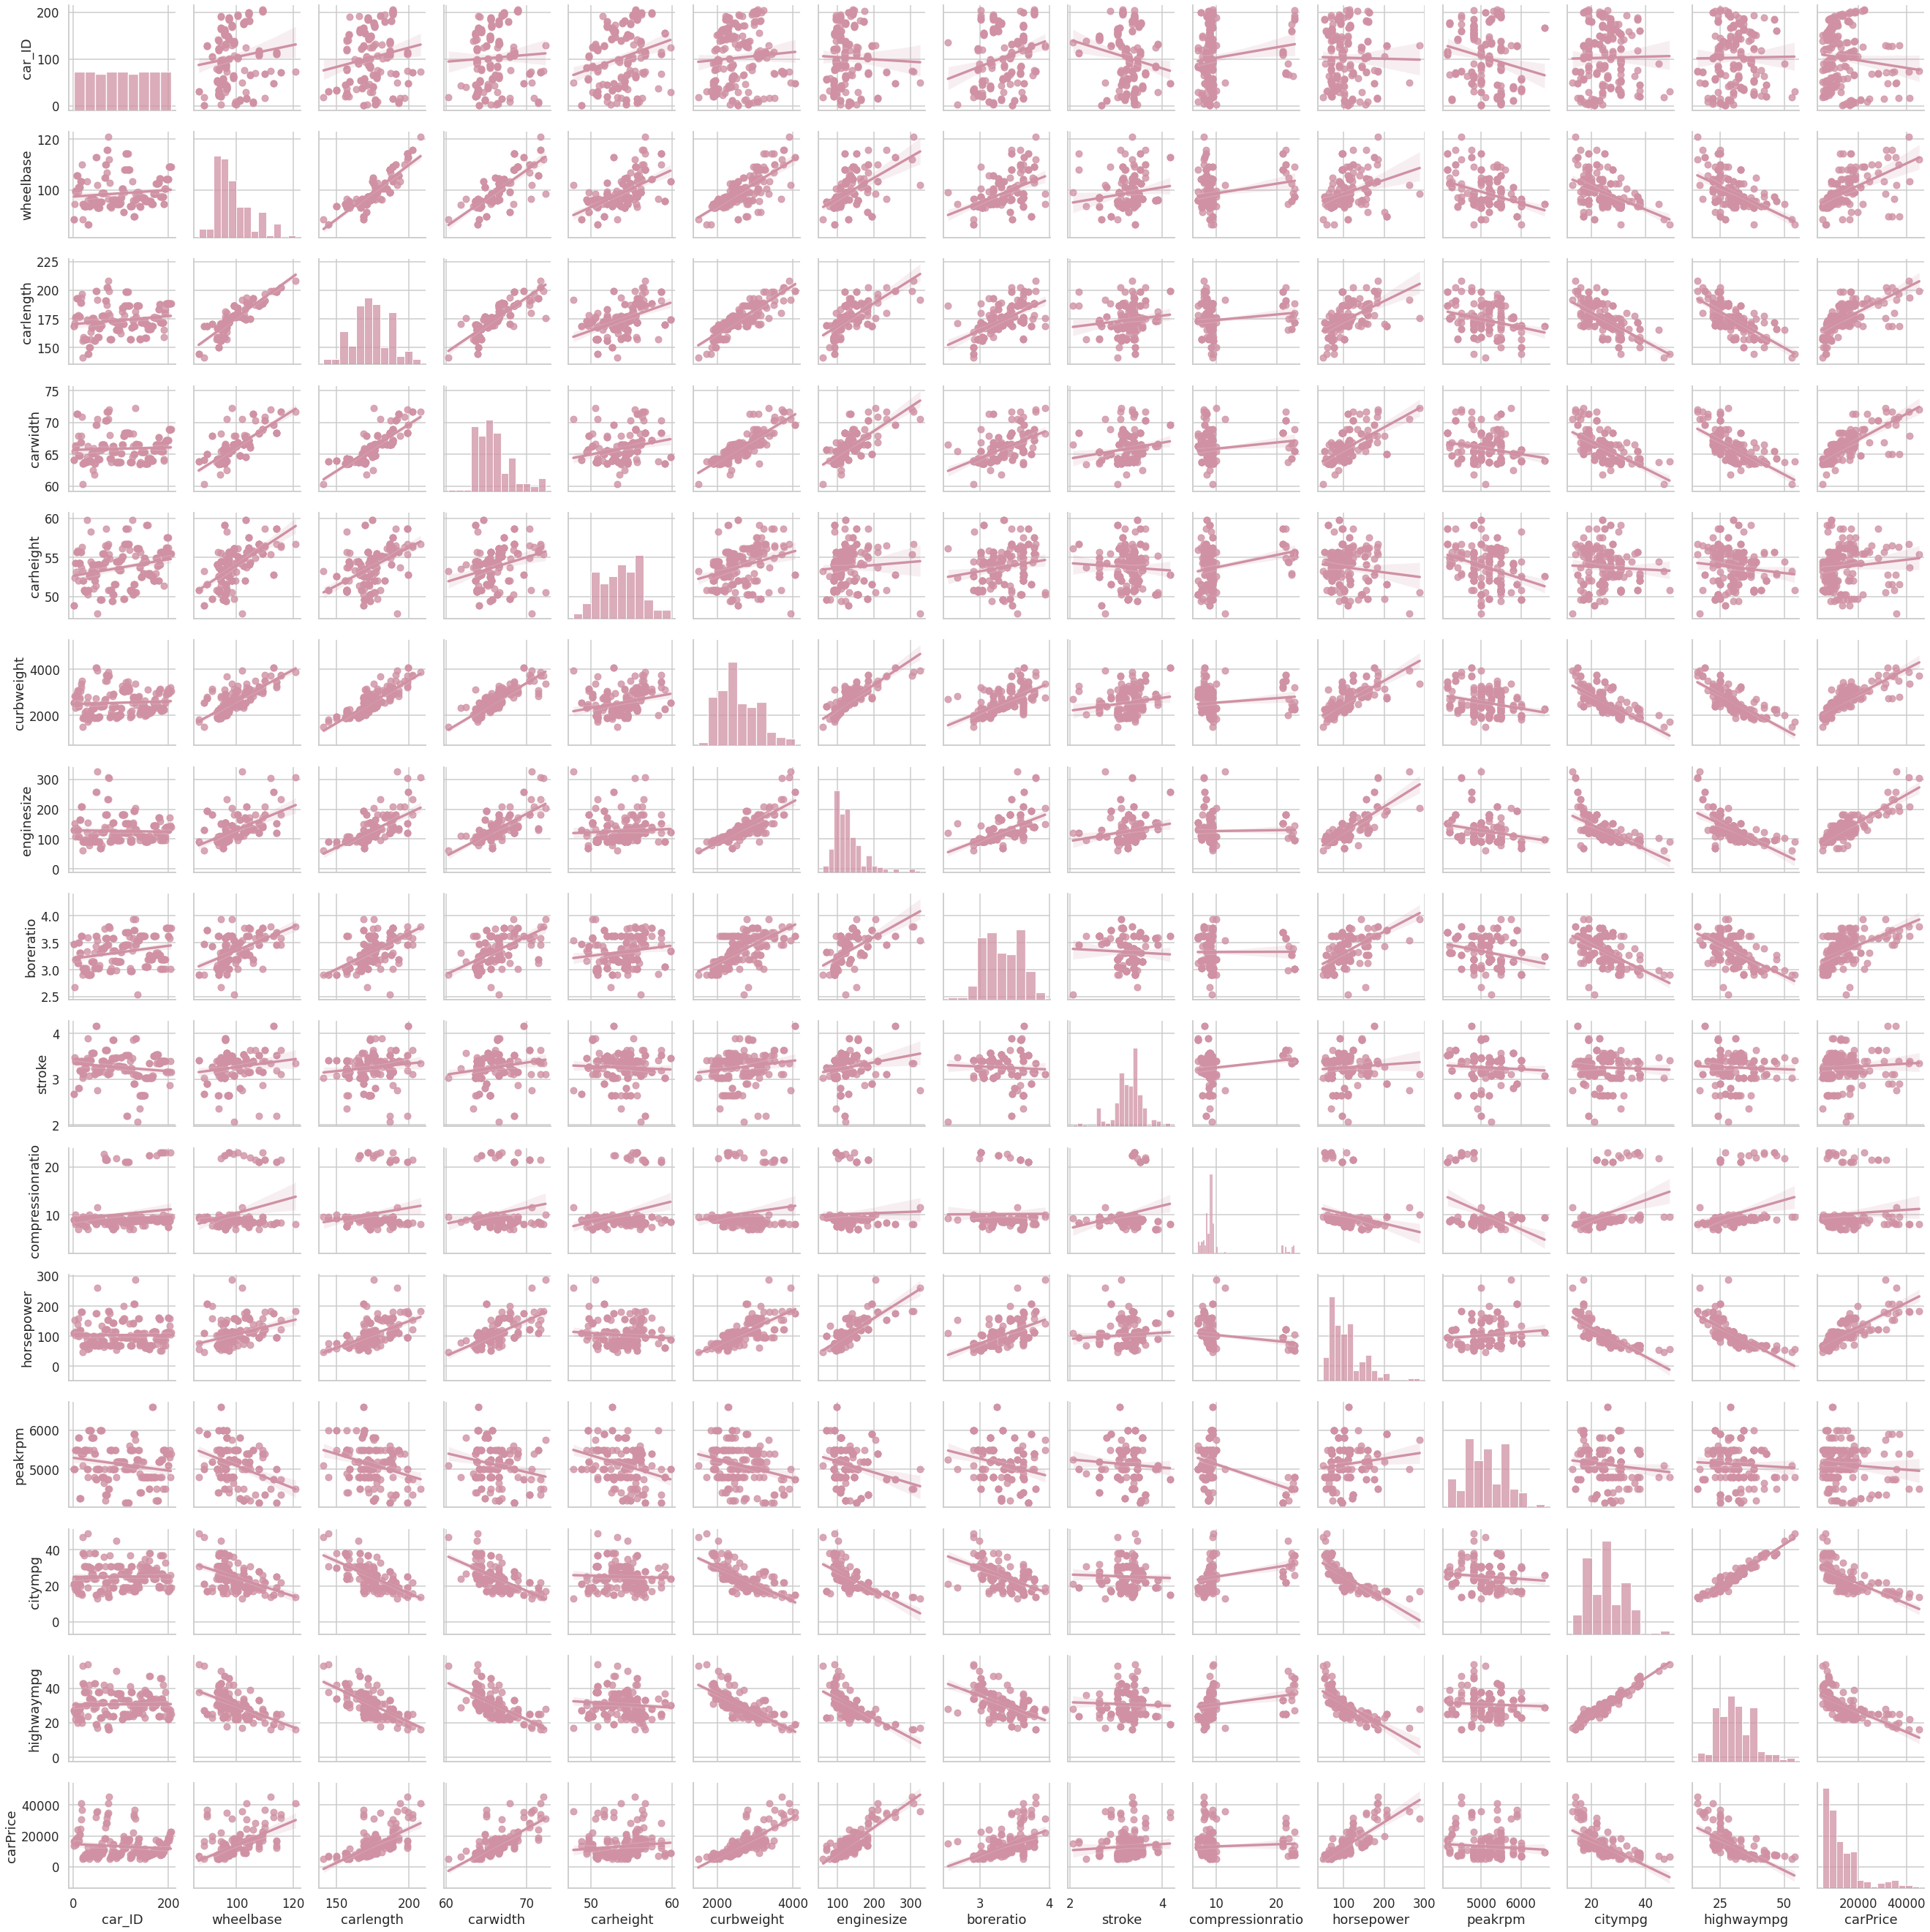

In [ ]:
plt.figure(figsize=(20, 10))
sns.pairplot(carDataPropertyNumericalValue, kind="reg")
plt.show()

In [ ]:
carData.corr()

car_ID  wheelbase  carlength  carwidth  carheight  \
car_ID            1.000000   0.129729   0.170636  0.052387   0.255960   
wheelbase         0.129729   1.000000   0.874587  0.795144   0.589435   
carlength         0.170636   0.874587   1.000000  0.841118   0.491029   
carwidth          0.052387   0.795144   0.841118  1.000000   0.279210   
carheight         0.255960   0.589435   0.491029  0.279210   1.000000   
curbweight        0.071962   0.776386   0.877728  0.867032   0.295572   
enginesize       -0.033930   0.569329   0.683360  0.735433   0.067149   
boreratio         0.260064   0.488750   0.606454  0.559150   0.171071   
stroke           -0.160824   0.160959   0.129533  0.182942  -0.055307   
compressionratio  0.150276   0.249786   0.158414  0.181129   0.261214   
horsepower       -0.015006   0.353294   0.552623  0.640732  -0.108802   
peakrpm          -0.203789  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           0.015940  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg        0.011255  -0.544082  -0.704662 -0.677218  -0.107358   
carPrice         -0.109093   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
car_ID              0.071962   -0.033930   0.260064 -0.160824   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
carPrice            0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
carPrice                  0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg  carPrice  
car_ID              0.011255 -0.109093  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
carPrice           -0.697599  1.000000

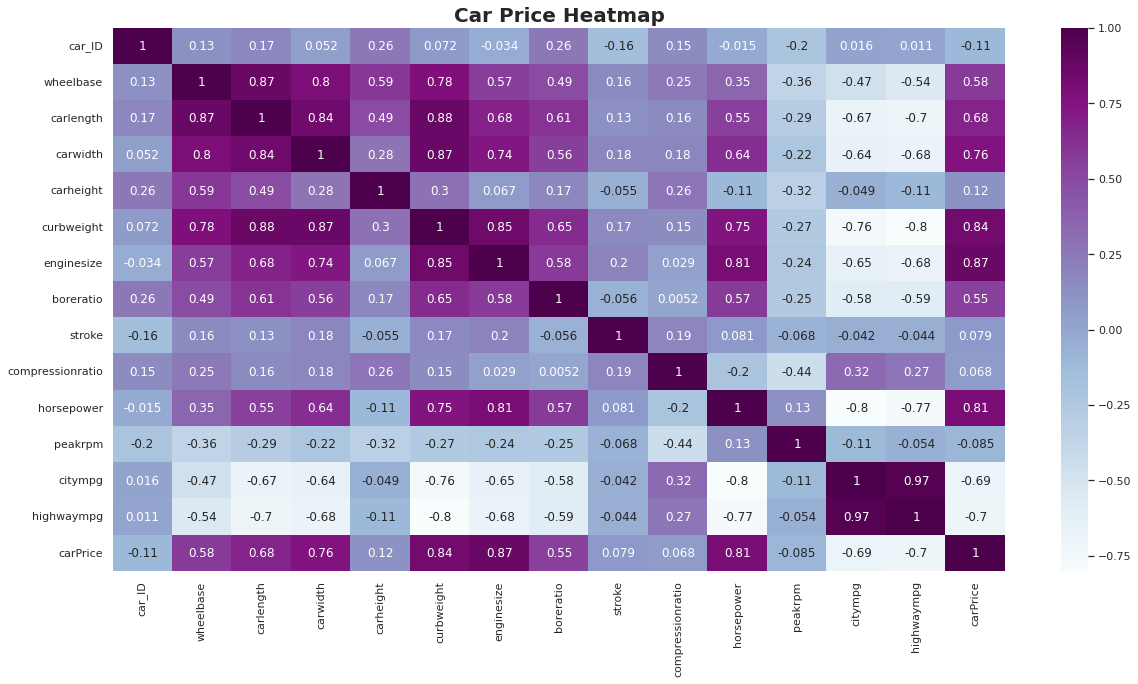

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(20, 10))
carDataCorrelations = carData.corr()
sns.heatmap(carDataCorrelations, cmap="BuPu", annot=True)
plt.title("Car Price Heatmap", fontsize = 20, fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.show()

### 4. 資料分割與建置迴歸模型

##### 資料分割

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_Train, X_test, Y_Train, Y_test = train_test_split(carDataX, carDataY, random_state=100, train_size=0.8, test_size=0.2)

#### 多元線性迴歸

##### 原始資料 線性擬和

In [ ]:
linearModel = LinearRegression()
linearModel.fit(X_Train, Y_Train)
print('linearModel.coef_ = \n', linearModel.coef_)
print('linearModel.intercept_ = \n', linearModel.intercept_)

linearModel.coef_ = 
 [[ 4.85957591e+03  1.22794174e+03 -1.06471467e+03  9.22767256e+02
  -8.94767285e+02  2.82242104e+03  1.01379113e+04 -3.92973071e+03
  -1.27000897e+03 -1.89017152e+03 -4.12556325e+02  1.34685624e+03
   4.06732605e+02  3.20516398e+02  8.77194275e+02  9.69724884e+02
   9.10491638e+02  6.73049363e+02  6.68513608e+02 -8.01564887e+02
   8.82857444e+02  1.08451329e+02 -6.39168662e+02 -1.32558877e+03
  -1.04763336e+03 -6.46897686e+02  1.08159732e+02  3.94032762e+02
   1.72427766e+03  5.18725046e+02 -1.03374799e+03  6.44754186e+02
  -5.63972165e+02 -8.45678552e+01  2.37208317e+03  1.23707319e+03
   1.65014808e+03 -4.91959783e+02 -1.98713465e+03 -1.49177062e+03
  -1.76314219e+03  2.31986284e+02 -2.14357928e+02  8.01564887e+02
  -1.40081962e+02 -5.55519674e+02 -1.91002598e+02  3.41060513e-13
   4.80675809e+02  1.86187477e+03 -5.97005263e+02 -6.55853874e+02
  -1.34246115e+03 -1.62773247e+03 -7.74048705e+02 -6.70383956e+02
  -1.45373034e+03 -7.95807864e-13 -2.89384622e+03 -2.4

In [ ]:
Y_pred = linearModel.predict(X_test)

##### RFE15 線性擬和

In [ ]:
featuresLinearModel = LinearRegression()
rfe15 = RFE(featuresLinearModel, n_features_to_select=15)
rfe15.fit(X_Train, Y_Train)
print('rfe15.support_ = \n', rfe15.support_)
print('rfe15.ranking_ = \n', rfe15.ranking_)
print('rfe15.n_features_in_ = \n', rfe15.n_features_)

rfe15.support_ = 
 [False  True  True  True False  True  True False False False False False
 False False False False  True  True  True False False False  True  True
  True  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False]
rfe15.ranking_ = 
 [23  1  1  1 15  1  1 12  7 42 46  4 41  5  3  2  1  1  1 44 13 51  1  1
  1  1 52 43  1 38 32  8 35 53  6  9 11 40 30 34 10 50 47 45 49 29 48 55
 39  1 31 26 16 19 27 37 25 54 14 22  1 17 36 24 33 28 18 21 20]
rfe15.n_features_in_ = 
 15


In [ ]:
Y_rfe15pred = rfe15.predict(X_test)

##### RFE10 線性擬和

In [ ]:
featuresLinearModel = LinearRegression()
rfe10 = RFE(featuresLinearModel, n_features_to_select=10)
rfe10.fit(X_Train, Y_Train)
print('rfe10.support_ = \n', rfe10.support_)
print('rfe10.ranking_ = \n', rfe10.ranking_)
print('rfe10.n_features_in_ = \n', rfe10.n_features_)

rfe10.support_ = 
 [False False  True  True False  True  True False False False False False
 False False False False False False False False False False False  True
  True  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False]
rfe10.ranking_ = 
 [28  3  1  1 20  1  1 17 12 47 51  9 46 10  8  7  4  6  5 49 18 56  2  1
  1  1 57 48  1 43 37 13 40 58 11 14 16 45 35 39 15 55 52 50 54 34 53 60
 44  1 36 31 21 24 32 42 30 59 19 27  1 22 41 29 38 33 23 26 25]
rfe10.n_features_in_ = 
 10


In [ ]:
Y_rfe10pred = rfe10.predict(X_test)

##### RFE6 線性擬和

In [ ]:
featuresLinearModel = LinearRegression()
rfe6 = RFE(featuresLinearModel, n_features_to_select=6)
rfe6.fit(X_Train, Y_Train)
print('rfe6.support_ = \n', rfe6.support_)
print('rfe6.ranking_ = \n', rfe6.ranking_)
print('rfe6.n_features_in_ = \n', rfe6.n_features_)

rfe6.support_ = 
 [False False  True  True False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False]
rfe6.ranking_ = 
 [32  7  1  1 24  1  1 21 16 51 55 13 50 14 12 11  8 10  9 53 22 60  6  3
  5  4 61 52  1 47 41 17 44 62 15 18 20 49 39 43 19 59 56 54 58 38 57 64
 48  1 40 35 25 28 36 46 34 63 23 31  2 26 45 33 42 37 27 30 29]
rfe6.n_features_in_ = 
 6


In [ ]:
Y_rfe6pred = rfe6.predict(X_test)

##### 自己選特徵 |r| >= 0.6 線性擬和

In [ ]:
newCarData = carDataX.join(carDataY, how='outer')

In [ ]:
newCarDataColumnsName = newCarData.columns[newCarData.corr()['carPrice'].abs() >= 0.6]
newCarData = newCarData.drop((newCarData.columns).drop(newCarDataColumnsName), axis=1)
print(newCarData.columns)

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_4', 'carPrice'],
      dtype='object')


In [ ]:
newCarDataX = newCarData.drop('carPrice', axis=1)
newCarDataY = newCarData.drop((newCarDataColumnsName.drop('carPrice')), axis=1)

In [ ]:
X_myTrain, X_myTest, Y_myTrain, Y_myTest = train_test_split(newCarDataX, newCarDataY, random_state=100, train_size=0.8, test_size=0.2)

In [ ]:
myLinearModel = LinearRegression()
myLinearModel.fit(X_myTrain, Y_myTrain)

LinearRegression()

In [ ]:
print('myLinearModel.coef_ = \n', myLinearModel.coef_)
print('myLinearModel.intercept_ = \n', myLinearModel.intercept_)

myLinearModel.coef_ = 
 [[ -180.13892527  1413.83801705   871.30930807  2815.73000641
   1284.7929527   -554.46925999  1018.91137817  -513.86698368
    753.73406001 -1350.43022653]]
myLinearModel.intercept_ = 
 [13271.23685672]


In [ ]:
Y_myPred = myLinearModel.predict(X_myTest)

#### 正規化的迴歸

##### 脊迴歸(Ridge Regression)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.logspace(-3, 3, 50)
regRidge = RidgeCV(alphas, store_cv_values=True)
regRidge.fit(X_Train, Y_Train)

RidgeCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-0...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
        store_cv_values=True)

Best alpha: 14.563


(0.001, 1000.0)

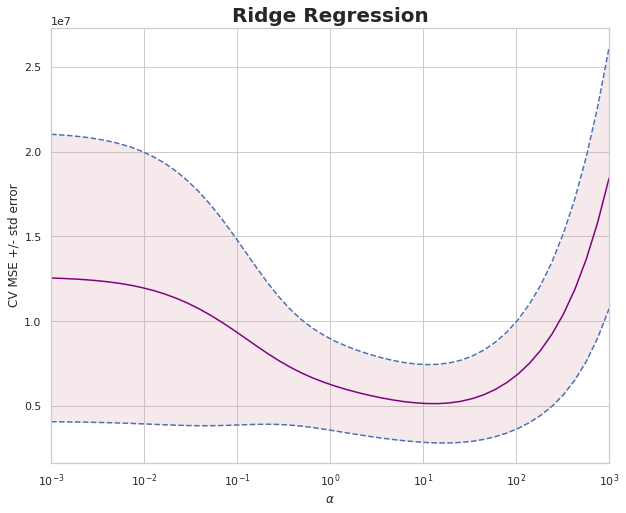

In [ ]:
print('Best alpha: %.3f' % regRidge.alpha_)

scores = np.mean(regRidge.cv_values_, axis=0)[0]
scores_std = np.std(regRidge.cv_values_, axis=0)[0]

# 繪製MSE+/-(std error)
plt.figure(figsize=(10, 8))
plt.semilogx(alphas, scores, color='purple')
std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)
plt.title("Ridge Regression", fontsize = 20, fontweight = 'bold')
plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$')
plt.xlim([alphas[0], alphas[-1]])

In [ ]:
ridgeModel = Ridge(alpha=regRidge.alpha_)
Y_RidgePred = ridgeModel.fit(X_Train, Y_Train).predict(X_test)

##### 套索迴歸(Lasso Regression)

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
alphas = np.logspace(-5, 3, 50)
regLasso = LassoCV(alphas=alphas, cv=10, n_jobs=-1)
reg_y = scalar.fit_transform(Y_Train.loc[:, ['carPrice']])
regLasso.fit(X_Train, reg_y.reshape(-1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019787423434408424, tolerance: 0.0148040907181162
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0907014358977749, tolerance: 0.01575422472485101
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03060602129502943, tolerance: 0.01575422472485101
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0

LassoCV(alphas=array([1.00000000e-05, 1.45634848e-05, 2.12095089e-05, 3.08884360e-05,
       4.49843267e-05, 6.55128557e-05, 9.54095476e-05, 1.38949549e-04,
       2.02358965e-04, 2.94705170e-04, 4.29193426e-04, 6.25055193e-04,
       9.10298178e-04, 1.32571137e-03, 1.93069773e-03, 2.81176870e-03,
       4.09491506e-03, 5.96362332e-03, 8.68511374e-03, 1.26485522e-02,
       1.84206997e-02, 2.68269580e-0...
       8.28642773e-02, 1.20679264e-01, 1.75751062e-01, 2.55954792e-01,
       3.72759372e-01, 5.42867544e-01, 7.90604321e-01, 1.15139540e+00,
       1.67683294e+00, 2.44205309e+00, 3.55648031e+00, 5.17947468e+00,
       7.54312006e+00, 1.09854114e+01, 1.59985872e+01, 2.32995181e+01,
       3.39322177e+01, 4.94171336e+01, 7.19685673e+01, 1.04811313e+02,
       1.52641797e+02, 2.22299648e+02, 3.23745754e+02, 4.71486636e+02,
       6.86648845e+02, 1.00000000e+03]),
        cv=10, n_jobs=-1)

Best alpha: 0.006


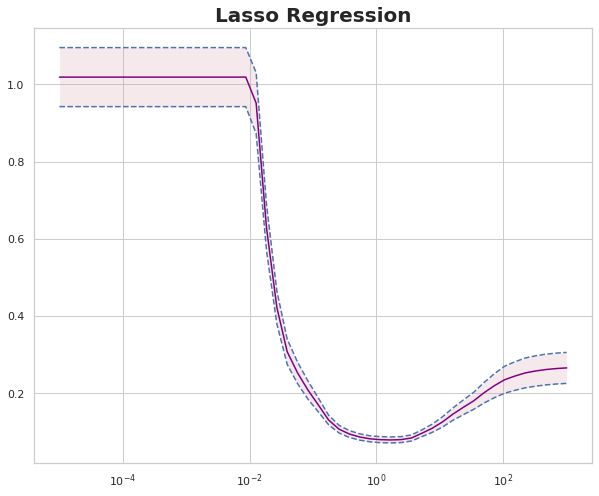

In [ ]:
print('Best alpha: %.3f' % regLasso.alpha_)

scores = np.mean(regLasso.mse_path_, axis=1)
scores_std = np.std(regLasso.mse_path_, axis=1)

# 繪製MSE+/-標準誤(std error)
plt.figure(figsize=(10, 8))
plt.semilogx(alphas, scores, color='purple')
std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')
plt.title("Lasso Regression", fontsize = 20, fontweight = 'bold')
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)

In [ ]:
lassoModel = Lasso(alpha=regLasso.alpha_, fit_intercept=False)
Y_LassoPred = lassoModel.fit(X_Train, Y_Train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+08, tolerance: 3.635e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


##### 彈性網(Elastic Net)

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

rho = [.1, .5, .7, .9, .95, .99, 1]
regElastic = ElasticNetCV(cv=10, l1_ratio=rho)
reg_y = scalar.fit_transform(Y_Train.loc[:, ['carPrice']])
regElastic.fit(X_Train, reg_y.reshape(-1))

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

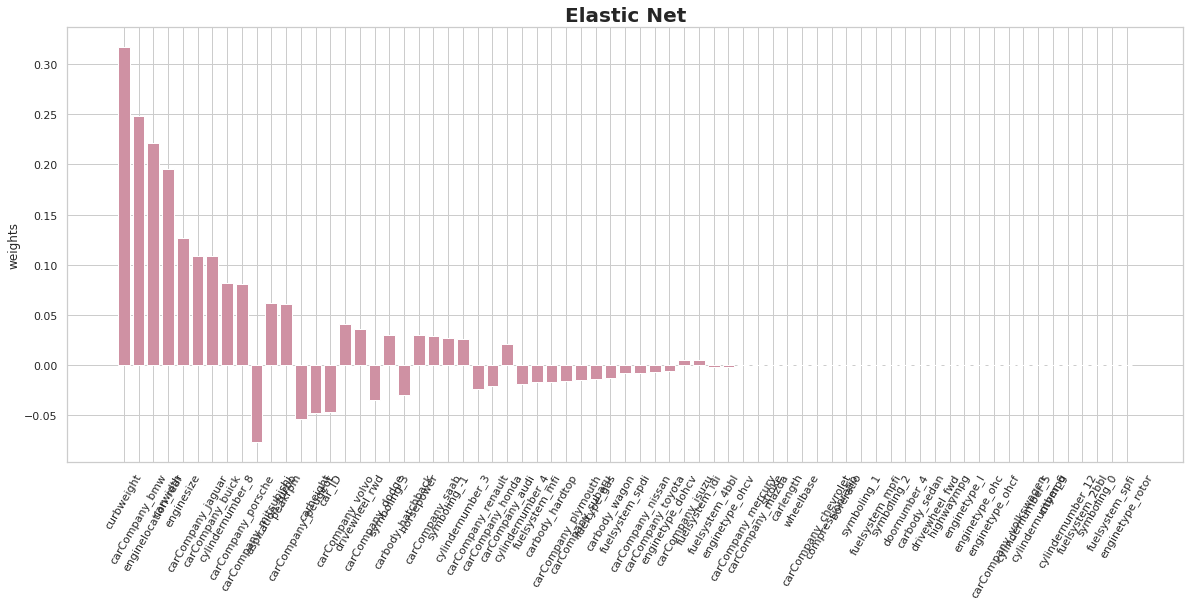

In [ ]:
df_coef = pd.DataFrame(data=regElastic.coef_.reshape(1,-1), columns=X_Train.columns[:])
coef = np.array(df_coef)[0]
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.figure(figsize=(20, 8))
plt.title("Elastic Net", fontsize = 20, fontweight = 'bold')
plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], rotation=60)
plt.ylabel('weights');

In [ ]:
elasticModel = Lasso(alpha=regElastic.alpha_)
Y_ElasticPred = elasticModel.fit(X_Train, Y_Train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+08, tolerance: 9.643e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### 5. 模型效能評估

#### 計算函式

* 基本指標 : MSE、MAE、R-square
* 常態性檢定 : Shapiro-Wilk檢定、Kolmogorov-Smirnov檢定、D’Agostino-Pearson omnibus檢定、Jarque-Bera檢定
* QQ圖
* Durbin-Watson統計量

##### 基本指標計算函式

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def modelScoreCal(smModel, yTrain, yTest, yTrainPred, yTestPred):
  # smModel.summary()
  print('test R2 score = ', r2_score(y_true=yTrain, y_pred=yTrainPred))
  print('R2 score      = ', r2_score(y_true=yTest, y_pred=yTestPred))
  print('MSE           = ', mean_squared_error(y_true=yTest, y_pred=yTestPred))
  print('MAE           = ', mean_absolute_error(y_true=yTest, y_pred=yTestPred))
  print('')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### 常態性檢定計算函式

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import jarque_bera

def checkAlphaFunction(p):
  alpha = 0.05
  if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
  else:
    print('看起來不是常態分布（拒絕H0）')

def normalDistributionTest(model):
  print('Shapiro-Wilk 常態性檢定 : ', end='')
  stat, shapiroP = shapiro(model.resid)
  checkAlphaFunction(shapiroP)
  print('Statistics: %.3f, p-value: %.3f'%(stat, shapiroP), '\n')
  print('Kolmogorov-Smirnov 常態性檢定 : ', end='')
  stat, kstestP = kstest(model.resid, 'norm')
  checkAlphaFunction(kstestP)
  print('Statistics: %.3f, p-value: %.3f'%(stat, kstestP), '\n')
  print('D’Agostino-Pearson omnibus 常態性檢定 : ', end='')
  stat, normaltestP = normaltest(model.resid)
  checkAlphaFunction(normaltestP)
  print('Statistics: %.3f, p-value: %.3f'%(stat, normaltestP), '\n')
  print('Jarque-Bera 常態性檢定 : ', end='')
  stat, jarqueberaP = jarque_bera(model.resid)
  checkAlphaFunction(jarqueberaP)
  print('Statistics: %.3f, p-value: %.3f'%(stat, jarqueberaP), '\n')

##### 繪製QQ圖函式

In [ ]:
def drawQQ(model, modelName):
  plt.figure(figsize=(15, 10), dpi=40)
  sm.qqplot(model.resid, line='r')
  plt.title("%s QQ plot"%(modelName), fontsize = 20, fontweight = 'bold')
  plt.show()
  print('')

##### Durbin-Watson統計量計算函式

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler

def durbinValueCal(model, modelName):
  dw = durbin_watson(model.resid)
  print(modelName, 'dw =  %.3f '%(dw), end='')
  if 2 <= dw <= 4:
    print('誤差項獨立')
  elif 0 <= dw < 2:
    print('誤差項不獨立')
  else:
    print('計算錯誤')

#### 實際效能評估 - 多元線性迴歸

##### RFE 15 sm.OLS

========== RFE15 效能指標 ========== 

test R2 score =  0.925149910799557
R2 score      =  0.8612846432673491
MSE           =  10686461.822221642
MAE           =  2306.006654355055

========== RFE15 常態性檢定 ========== 

Shapiro-Wilk 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.966, p-value: 0.000 

Kolmogorov-Smirnov 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.543, p-value: 0.000 

D’Agostino-Pearson omnibus 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 28.836, p-value: 0.000 

Jarque-Bera 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 60.982, p-value: 0.000 

========== RFE15 QQ圖 ========== 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 600x400 with 0 Axes>

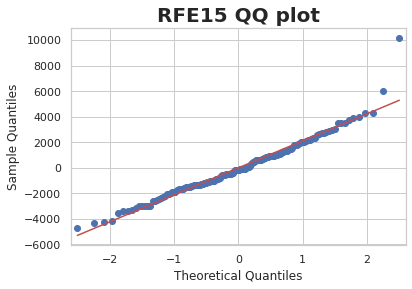


========== RFE15 Durbin-Watson統計量 ========== 

RFE15 dw =  1.897 誤差項不獨立


In [ ]:
# train
rfe15_X_Train = X_Train[X_Train.columns[rfe15.support_]]
rfe15_X_Train = sm.add_constant(rfe15_X_Train)
sm15 = sm.OLS(Y_Train, rfe15_X_Train).fit()
rfe15_Y_TrainPred = sm15.predict(rfe15_X_Train)
# test
rfe15_X_test = X_test[X_Train.columns[rfe15.support_]]
rfe15_X_test = sm.add_constant(rfe15_X_test, has_constant='add')
rfe15_Y_pred = sm15.predict(rfe15_X_test)

print('========== RFE15 效能指標 ==========','\n')
modelScoreCal(sm15, Y_Train, Y_test, rfe15_Y_TrainPred, Y_rfe15pred)

print('========== RFE15 常態性檢定 ==========','\n')
normalDistributionTest(sm15)

print('========== RFE15 QQ圖 ==========','\n')
drawQQ(sm15, 'RFE15')

print('========== RFE15 Durbin-Watson統計量 ==========','\n')
durbinValueCal(sm15, 'RFE15')

##### RFE 10 sm.OLS

========== RFE10 效能指標 ========== 

test R2 score =  0.9192043715598202
R2 score      =  0.8540701297365956
MSE           =  11242259.141482344
MAE           =  2278.569908113176

========== RFE10 常態性檢定 ========== 

Shapiro-Wilk 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.979, p-value: 0.014 

Kolmogorov-Smirnov 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.500, p-value: 0.000 

D’Agostino-Pearson omnibus 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 16.710, p-value: 0.000 

Jarque-Bera 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 26.987, p-value: 0.000 

========== RFE10 QQ圖 ========== 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 600x400 with 0 Axes>

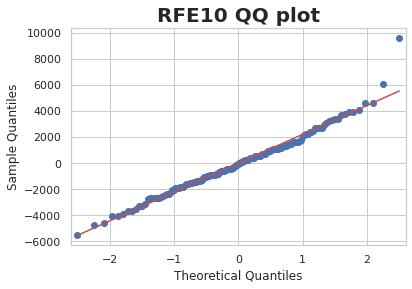


========== RFE10 Durbin-Watson統計量 ========== 

RFE10 dw =  1.785 誤差項不獨立


In [ ]:
# train
rfe10_X_Train = X_Train[X_Train.columns[rfe10.support_]]
rfe10_X_Train = sm.add_constant(rfe10_X_Train)
sm10 = sm.OLS(Y_Train, rfe10_X_Train).fit()
rfe10_Y_TrainPred = sm10.predict(rfe10_X_Train)
# test
rfe10_X_test = X_test[X_Train.columns[rfe10.support_]]
rfe10_X_test = sm.add_constant(rfe10_X_test, has_constant='add')
rfe10_Y_pred = sm10.predict(rfe10_X_test)

print('========== RFE10 效能指標 ==========','\n')
modelScoreCal(sm10, Y_Train, Y_test, rfe10_Y_TrainPred, Y_rfe10pred)

print('========== RFE10 常態性檢定 ==========','\n')
normalDistributionTest(sm10)

print('========== RFE10 QQ圖 ==========','\n')
drawQQ(sm10, 'RFE10')

print('========== RFE10 Durbin-Watson統計量 ==========','\n')
durbinValueCal(sm10, 'RFE10')

##### RFE 6 sm.OLS

========== RFE6 效能指標 ========== 

test R2 score =  0.9025024050502138
R2 score      =  0.8503749742013147
MSE           =  11526929.415092042
MAE           =  2511.867250489472

========== RFE6 常態性檢定 ========== 

Shapiro-Wilk 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.980, p-value: 0.016 

Kolmogorov-Smirnov 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 0.561, p-value: 0.000 

D’Agostino-Pearson omnibus 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 12.016, p-value: 0.002 

Jarque-Bera 常態性檢定 : 看起來不是常態分布（拒絕H0）
Statistics: 14.006, p-value: 0.001 

========== RFE6 QQ圖 ========== 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 600x400 with 0 Axes>

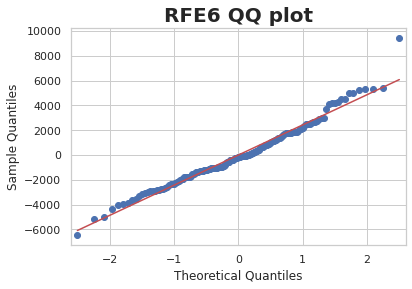


========== RFE6 Durbin-Watson統計量 ========== 

RFE6 dw =  1.858 誤差項不獨立


In [ ]:
# train
rfe6_X_Train = X_Train[X_Train.columns[rfe6.support_]]
rfe6_X_Train = sm.add_constant(rfe6_X_Train)
sm6 = sm.OLS(Y_Train, rfe6_X_Train).fit()
rfe6_Y_TrainPred = sm6.predict(rfe6_X_Train)
# test
rfe6_X_test = X_test[X_Train.columns[rfe6.support_]]
rfe6_X_test = sm.add_constant(rfe6_X_test, has_constant='add')
rfe6_Y_pred = sm6.predict(rfe6_X_test)

print('========== RFE6 效能指標 ==========','\n')
modelScoreCal(sm6, Y_Train, Y_test, rfe6_Y_TrainPred, Y_rfe6pred)

print('========== RFE6 常態性檢定 ==========','\n')
normalDistributionTest(sm6)

print('========== RFE6 QQ圖 ==========','\n')
drawQQ(sm6, 'RFE6')

print('========== RFE6 Durbin-Watson統計量 ==========','\n')
durbinValueCal(sm6, 'RFE6')

#### 實際效能評估 - 正規化的迴歸

##### 脊迴歸(Ridge Regression)

In [ ]:
# train
Y_RidgeTrainPred = ridgeModel.predict(X_Train)

print('========== 脊迴歸 效能指標 ==========','\n')
modelScoreCal(ridgeModel, Y_Train, Y_test, Y_RidgeTrainPred, Y_RidgePred)

========== 脊迴歸 效能指標 ========== 

test R2 score =  0.9595090296137754
R2 score      =  0.9128716467156524
MSE           =  6712262.023019835
MAE           =  1906.4386638434376



##### 套索迴歸(Lasso Regression)

In [ ]:
# train
Y_LassoTrainPred = lassoModel.predict(X_Train)

print('========== 套索迴歸 效能指標 ==========','\n')
modelScoreCal(lassoModel, Y_Train, Y_test, Y_LassoTrainPred, Y_LassoPred)

========== 套索迴歸 效能指標 ========== 

test R2 score =  0.975600953577436
R2 score      =  -2363.7054430152316
MSE           =  182174021916.59323
MAE           =  69438.97435991424



##### 彈性網(Elastic Net)

In [ ]:
# train
Y_ElasticTrainPred = elasticModel.predict(X_Train)

print('========== 彈性網 效能指標 ==========','\n')
modelScoreCal(elasticModel, Y_Train, Y_test, Y_ElasticTrainPred, Y_ElasticPred)

========== 彈性網 效能指標 ========== 

test R2 score =  0.9756282552269503
R2 score      =  0.8297934224892151
MSE           =  13112507.045385242
MAE           =  2340.533047783812



### 6. 預測結果分析

詳見紙本報告OuO